<a href="https://colab.research.google.com/github/lonestarchaser/SED/blob/main/SED_with_Reddening_Movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SED With Reddening##

I work in cgs units (centimeters-grams-seconds) which makes no sense for people who study things at the scale of the Universe, but that is how I was trained in grad school, so there you go.  In cgs units, those constants are :
$$    h = 6.6260755 \times 10^{-27} \mathrm{erg} \cdot \mathrm{s} $$
$$    c = 2.997924 \times 10^{10} \mathrm{cm/s} $$
$$    k = 1.380658 \times 10^{-16} \mathrm{erg/K}$$


The grid of effective temperatures and spectral types comes from I think the big Lang reference book but now I'm not sure (it's not written in my code, shame on me):

    teff = [  2640,  2940,  3050,  3240,  3370,  3470,  3580,  3720,  3850,  4060,
              4350,  4590,  4730,  4900,  5080,  5250,  5570,  5770,  5860,  6030,
              6200,  6440,  6890,  7200,  7580,  7850,  8200,  8720,  8970,  9230,
              9520, 10500, 11900, 13000, 14000, 15400, 18700, 22000, 25400, 30000,
             33000, 35800, 38000, 41000, 44500, 48000, 52500]

    types = ['m8', 'm7', 'm6', 'm5', 'm4', 'm3', 'm2', 'm1', 'm0', 'k7',
             'k5', 'k4', 'k3', 'k2', 'k1', 'k0', 'g8', 'g5', 'g2', 'g0',
             'f8', 'f5', 'f2', 'f0', 'a8', 'a7', 'a5', 'a3', 'a2', 'a1',
             'a0', 'b9', 'b8', 'b7', 'b6', 'b5', 'b3', 'b2', 'b1', 'b0',
             'o9', 'o8', 'o7', 'o6', 'o5', 'o4', 'o3']


In my IDL code, I make an array of wavelengths in microns to plot on the x-axis, but then immediately convert them to cm so that I can use them in the calculation. (watch your units!)
$$\lambda = \lambda * 10^{-4} \mathrm{cm} $$
$$ \Lambda = \frac{2hc^2/ \lambda^5}{e^{hc/\lambda k T}-1} $$

Let's check units:

$$\Lambda = \frac{ ( \mathrm{erg} \cdot \mathrm{s} \cdot ({\mathrm{cm/s}})^2 ) / \mathrm{cm}^5} { e^{(\mathrm{erg} \cdot \mathrm{s} \cdot {\mathrm{cm/s}}) / (\mathrm{cm} \cdot \mathrm{erg/K} \cdot{K})   } }$$

$$\Lambda = \frac{ ( \mathrm{erg} \cdot \mathrm{s} \cdot \mathrm{cm}^2 ) / ( \mathrm{s}^2 \cdot \mathrm{cm}^5 )} { e^{(\mathrm{erg} \cdot {\mathrm{cm}}) / (\mathrm{cm} \cdot \mathrm{erg} )   } }$$

$$\Lambda = \frac{ \mathrm{erg} / (\mathrm{s} \cdot \mathrm{cm}^3 )  } { e^{\mathrm{unitless}} }$$

So the units on $\Lambda$ are $\frac{ \mathrm{erg} } { \mathrm{s} \cdot \mathrm{cm}^3 }$.

Then what you want to plot is actually $\lambda \cdot \Lambda$ (because you want energy density), and that equation was just $\Lambda$).

Well, more specifically, you want to plot the logarithm of that, against the logarithm of the wavelength in microns (note i'm converting it back from cm here to $\mu$m).

    plot, alog10(lambda*1d4), alog10(blambda)

Let's check units one more time:

So the units on $\Lambda \cdot \lambda$ are $\frac{ \mathrm{erg} } { \mathrm{s} \cdot \mathrm{cm}^3 } \cdot \mathrm{cm}$, or just  $\frac{ \mathrm{erg} } { \mathrm{s} \cdot \mathrm{cm}^2 }$, which makes sense as an energy density.

# Add the reddening

I have code that enables me to choose from among these reddening laws:

* Mathis, John S. 1990. Interstellar Dust and Extinction. <i>Annual review of astronomy and astrophysics</i>, Vol.28 (1), p.37-70

* Cox, Arthur N. 1989. Allen's Astrophysical Quantities. <i>The Astrophysical Journal</i>, 345, 245.  (Citing Claton, Cardelli, and Mathis 1989)

* Indebetouw, R. et al. 2005. The Wavelength Dependence of Interstellar Extinction from 1.25 to 8.0 μm Using GLIMPSE Data. <i>The Astrophysical Journal</i> Vol.619 (2), p.931-938, Article 931

The last one is the newest, but is also over the most limited wavelength range.  I take the first one as the most recent one that goes over the widest wavelength range. (There are more I could have chosen from in the literature, but this is the best choice for the galactic star forming regions I usually work with.)

This is reading in the values from the text in Mathis (1990), and casting them explicitly as doubles:

    redwave = [0.002, 0.004, 0.023, 0.041, 0.073, 0.091,  0.12, 0.13, 0.15, 0.18,
                 0.2, 0.218,  0.24,  0.26,  0.28,  0.33, 0.365, 0.44, 0.55, 0.7,
                 0.9,  1.25,  1.65,   2.2,   3.4,     5,     7,    9,  9.7,  10,
                  12,    15,    18,    20,    25,    35,    60,  100,  250]

    redalaj = [ 1.35, 3.39,  7.31,  9.15,  19.1,  17.2,  12.71,  11.09,   9.44,  8.93,
              10.08, 11.29,  9.03,  7.63,   6.9,  5.87,   5.53,    4.7,   3.55,  2.66,
                1.7,     1, 0.624, 0.382, 0.182, 0.095,   0.07,  0.157,  0.208, 0.192,
              0.098, 0.053, 0.083, 0.075, 0.048, 0.013, 0.0071, 0.0041, 0.0015]


The `alaj` means $A_{\lambda}/A_J$, meaning the reddening at that wavelength in magnitudes, expressed as a ratio to the reddening in J band, both in magnitudes. (And now you see why my code works in units of J band magnitudes — because that's how the table in Mathis (1990) is expressed. It's sorted so that it's monotonically *increasing* because we need that for the linear interpolation routine.

Get this reddening relationship interpolated for the wavelength array (in microns) that you are using for your blambda:

    linterp, redwave, redalaj, lambda/1d-4, newalaj



# Figuring out Interpoltion

## Here is the IDP documentation for linterp:

CALLING SEQUENCE:

      LINTERP, Xtab, Ytab, Xint, Yint, [MISSING =, /NoInterp ]   

INPUT PARAMETERS:
* Xtab -  Vector containing the current independent variable grid. Must be monotonic increasing or decreasing
* Ytab -  Vector containing the current dependent variable values at the XTAB grid points.
* Xint -  Scalar or vector containing the new independent variable grid points for which interpolated value(s) of the dependent variable are sought.    Note that -- due to a limitation of the intrinsic INTERPOLATE() function -- Xint is always converted to floating point internally.

OUTPUT PARAMETERS:
* Yint  -  Scalar or vector with the interpolated value(s) of the dependent variable at the XINT grid points. YINT is double precision if XTAB or YTAB are double, otherwise YINT is float


## Here is the Python documentation for numpy.interp:

   numpy.interp(x, xp, fp, left=None, right=None, period=None)[source]

One-dimensional linear interpolation for monotonically increasing sample points. Returns the one-dimensional piecewise linear interpolant to a function with given discrete data points (xp, fp), evaluated at x.

Parameters:

* xarray_like - The x-coordinates at which to evaluate the interpolated values.
* xp1-D sequence of floats - The x-coordinates of the data points, must be increasing if argument period is not specified. Otherwise, xp is internally sorted after normalizing the periodic boundaries with xp = xp % period.
* fp1-D sequence of float or complex - The y-coordinates of the data points, same length as xp.

Based on this, I think we want to do this:

    newalaj = np.interp(lambdy*10**4, redwave, redalaj)

Now, I have a grid of reddening values I'm looping through in making my movie — it looks like I had 80 * 0.2 steps in magnitudes of $A_j$.

    aj = np.linspace(0,15.8,80)

So for the current $A_j$, which is $A_j(i)$, calculate the reddening at the given wavelength for the newly interpolated relationship:

    redal = newalaj * aj(i)

Figure out the flux ratio implied by that reddening (remember one is in magnitudes and one is in flux):

    redfluxratio = 10^(redal/2.5)

Apply that to the calculated blambda to get the reddened stellar flux:

    starfluxred = blambda/redfluxratio

Calculate the spectral energy (rather than flux) density:

    starsedred = starfluxred*lambda

And plot it in the log:

    plot, alog10(lambda/1d-4), alog10(starsedred)

If you want to have a legend that prints out the reddening in $A_v$ as well as $A_j$, $A_j$ is approximately 0.18*Av, so $A_v \approx A_j/0.18$.

Aj is what you're looping through, and $A_v$ is therefore that value divided by 0.18.

The big, deep “v” that shows up near 10 microns at high Av is a giant absorption line from silicates (beach sand!)… that's one of the things that depends a lot on what chemistry you assume when you calculate your grains (or what chemistry is present when you empirically determine your reddening). If you don't have a lot of Si in your dust, you don't have much absorption at 10 microns.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

h = 6.6260755e-27    # erg seconds
c = 2.997924e10      # cm/s
k = 1.380658e-16     # erg/K

#  Teff is in Kelvin
Teff =  [ 2640, 2940, 3050, 3240, 3370, 3470, 3580, 3720, 3850, 4060, \
          4350, 4590, 4730, 4900, 5080, 5250, 5570, 5770, 5860, 6030, \
          6200, 6440, 6890, 7200, 7580, 7850, 8200, 8720, 8970, 9230, \
          9520,10500,11900,13000,14000,15400,18700,22000,25400,30000, \
         33000,35800,38000,41000,44500,48000,52500]
Ttypes = ['M8', 'M7', 'M6', 'M5', 'M4', 'M3', 'M2', 'M1', 'M0', 'K7', \
          'K5', 'K4', 'K3', 'K2', 'K1', 'K0', 'G8', 'G5', 'G2', 'G0', \
          'F8', 'F5', 'F2', 'F0', 'A8', 'A7', 'A5', 'A3', 'A2', 'A1', \
          'A0', 'B9', 'B8', 'B7', 'B6', 'B5', 'B3', 'B2', 'B1', 'B0', \
          'O9', 'O8', 'O7', 'O6', 'O5', 'O4', 'O3']

# Pick a static star to make it easier .
# (We picked G2, 5800 K for my movie, but you can do whatever you want).
T = Teff[16]
Tlabel = Ttypes[16]

lambdytoPlot = np.logspace(-3, 4, 1000) # in microns
lambdy = lambdytoPlot * 10**-4          # in cm

# Use the \ as a line continuation
redwave = [0.002, 0.004, 0.023, 0.041, 0.073, 0.091,  0.12, 0.13, 0.15, 0.18,  \
             0.2, 0.218,  0.24,  0.26,  0.28,  0.33, 0.365, 0.44, 0.55, 0.7,   \
             0.9,  1.25,  1.65,   2.2,   3.4,     5,     7,    9,  9.7,  10,   \
              12,    15,    18,    20,    25,    35,    60,  100,  250]

redalaj = [ 1.35, 3.39,  7.31,  9.15,  19.1,  17.2,  12.71,  11.09,   9.44,  8.93,  \
           10.08, 11.29,  9.03,  7.63,   6.9,  5.87,   5.53,    4.7,   3.55,  2.66, 	\
             1.7,     1, 0.624, 0.382, 0.182, 0.095,   0.07,  0.157,  0.208, 0.192,  \
           0.098, 0.053, 0.083, 0.075, 0.048, 0.013, 0.0071, 0.0041, 0.0015]

newalaj = np.interp(lambdy*10**4, redwave, redalaj)

aj = np.linspace(0,15.8,80)

# This will be the same for all the values since we're holding T constant
bigLambdy = (2*h*c**2 / lambdy**5) / (np.exp( (h*c) / (k * lambdy * T) ) - 1)     # ** is the equivalent of .^ in Matlab

# We have to feed in a fake initial value so we can keep appending to it in the for loop
lambdyBigLambdy = np.zeros(np.size(lambdy))
legendText = np.array([''], dtype=object)


for ajindex, AJVvalue in np.ndenumerate(aj):

  # The index value has some weird comma in it - I don't know why but this fixes it
  ajindexAsInt = int(ajindex[0])

  # For each aj, calculate the reddening at the given wavelength for the newly interpolated relationship:
  redal = newalaj * aj[ajindex]

  # Figure out the flux ratio implied by that reddening (remember one is in magnitudes and one is in flux):
  redFluxRatio = 10**(redal/2.5)

  # Apply that to the calculated blambda to get the reddened stellar flux:
  starFluxRed = bigLambdy/redFluxRatio

  # Calculate the spectral energy (rather than flux) density:
  starSEDRed = starFluxRed*lambdy

# And plot it in the log:
#    plot, alog10(lambda/1d-4), alog10(starsedred)



  # This is what we actually want to plot
  lambdyBigLambdy = np.vstack([lambdyBigLambdy, starSEDRed])

  legendText = np.vstack([legendText,'Aj = %6.2f; Av = %6.2f' % ( aj[ajindex] , aj[ajindex]/.18  )])


# Now let's get rid of that first garbage row
lambdyBigLambdy = np.delete(lambdyBigLambdy, (0), axis=0)
legendText = np.delete(legendText, (0), axis=0)

print('Data is ready to go!')


Data is ready to go!


<ipython-input-33-f8d557de9941>:45: RuntimeWarning: overflow encountered in exp
  bigLambdy = (2*h*c**2 / lambdy**5) / (np.exp( (h*c) / (k * lambdy * T) ) - 1)     # ** is the equivalent of .^ in Matlab


## Test the Graph Without Animation

The wavelengths I marked on the plot are a subset of all the wavelengths one COULD mark; a fairly complete list of wavelengths (and zero points) is here:
http://coolwiki.ipac.caltech.edu/index.php/Central_wavelengths_and_zero_points

The wavelengths I marked with vertical lines in my plots are(all in microns)

* 0.44 (B band)
* 0.55 (V band)
* 3.6 (irac-1)
* 5.8 (irac-3)
* 8 (irac-4)
* 24 (mips-1)
* 160 (mips-3 but also pacs-red)
* 500 (spire-long).

The ones that I marked with text are U,B,V, Sloan r, Cousins I, J, H, Ks, irac-1,2,3,4, wise-3, mips-1, mips-2 (which is also pacs-blue), mips-3 (which is also pacs-red), spire-short, and spire-long (wavelengths, all in microns: 0.36, 0.44, 0.55, 0.624, 0.797, 1.25, 1.65, 2.16, 3.6, 4.5, 5.8, 8, 12, 24, 70, 160, 250, 500)


<ipython-input-34-a876616b9280>:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10**15)


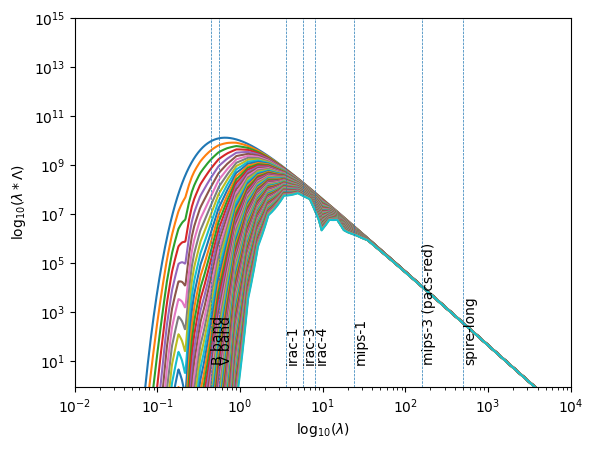

In [ ]:
## Now this is just the plotting part if you don't want animation:

# Convert x- and y--axis to Logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Set x- and y-axis limits and labels
plt.xlim(10**-2, 10**4)
plt.ylim(0,10**15)
plt.xlabel('$\mathrm{log}_{10}(λ)$')
plt.ylabel('$\mathrm{log}_{10}(λ * Λ)$')

for ajindex, T in np.ndenumerate(aj):
  # The index value has some weird comma in it - I don't know why but this fixes it
  ajIndexAsInt = int(ajindex[0])

  plt.plot(lambdytoPlot, lambdyBigLambdy[ajIndexAsInt], label = legendText[ajIndexAsInt])


wavelengthsOfNote =       [0.44,     0.55,     3.6,      5.8,      8,        24,       160,                 500]
wavelengthsOfNoteLabels = ['B band', 'V band', 'irac-1', 'irac-3', 'irac-4', 'mips-1', 'mips-3 (pacs-red)', 'spire-long']

for index, w in np.ndenumerate(wavelengthsOfNote):
  # The index value has some weird comma in it - I don't know why but this fixes it
  indexAsInt = int(index[0])
  plt.axvline(x = wavelengthsOfNote[indexAsInt], linestyle = '--', linewidth = 0.5)
  plt.text(wavelengthsOfNote[indexAsInt],10,wavelengthsOfNoteLabels[indexAsInt],rotation=90)

#plt.legend()


## Add the animation

Set this up using

    import matplotlib.animation

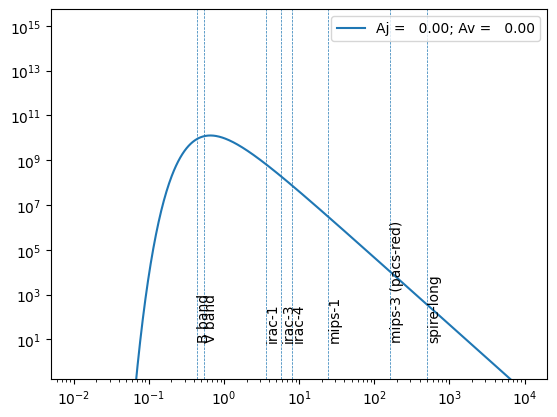

In [ ]:
'''
Once you have the data, this is how you make the animation.
'''

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
import matplotlib.animation

matplotlib.rcParams['animation.embed_limit'] = 2**128

# This is to just establish that we're plotting so we have the "ax" variable
#   to use in the next line
fig, ax = plt.subplots(1,1);

# This plots the "base picture" with the limits we want for the axis
#   I think we have to have the comma after it because it's a list

xLimits = [10**-2, 10**4]
yLimits = [10**0,10**15]
plt.xscale('log')
plt.yscale('log')
listOLines, = ax.plot(xLimits,yLimits);

wavelengthsOfNote =       [0.44,     0.55,     3.6,      5.8,      8,        24,       160,                 500]
wavelengthsOfNoteLabels = ['B band', 'V band', 'irac-1', 'irac-3', 'irac-4', 'mips-1', 'mips-3 (pacs-red)', 'spire-long']

for index, w in np.ndenumerate(wavelengthsOfNote):
  # The index value has some weird comma in it - I don't know why but this fixes it
  indexAsInt = int(index[0])
  plt.axvline(x = wavelengthsOfNote[indexAsInt], linestyle = '--', linewidth = 0.5)
  plt.text(wavelengthsOfNote[indexAsInt],10,wavelengthsOfNoteLabels[indexAsInt],rotation=90)


# This is the animation code
def animate(i):
  listOLines.set_data(lambdytoPlot, lambdyBigLambdy[i]);
  label = legendText[i]
  ax.legend(label)


# This creates the animation where it just animates the first frames == xx
#    number of frames in the data.  Then you can do interval == whatever to make
#    it not animate every single frame.
# If you want the animation itself to go faster once it's rendered, just click
#    the + button under the picture.
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(aj), interval = 1);

ani

# I don't know how to make that extra graph at the bottom go away.